In [1]:
import pandas as pd 
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot') 
import nltk
from nltk.tokenize import word_tokenize

In [2]:
# read data 
#review_filepath = (r"C:\Users\sulei\Downloads\preprocessed_kindle_reviews .csv") 
#review_data =  pd.read_csv(review_filepath)
df = pd. read_csv (r"C:\Users\sulei\Downloads\prj\y.csv")

print (df.shape)
df = df.head(500)
print (df.shape)

(12000, 11)
(500, 11)


In [3]:
df.head()


,Id,Unnamed: 0,asin,helpful,rating,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0,11539,B0033UV8HI,"[8, 10]",3,"Jace Rankin may be short, but he's nothing to ...","09 2, 2010",A3HHXRELK8BHQG,Ridley,Entertaining But Average,1283385600
1,1,5957,B002HJV4DE,"[1, 1]",5,Great short read. I didn't want to put it dow...,"10 8, 2013",A2RGNZ0TRF578I,Holly Butler,Terrific menage scenes!,1381190400
2,2,9146,B002ZG96I4,"[0, 0]",3,I'll start by saying this is the first of four...,"04 11, 2014",A3S0H2HV6U1I7F,Merissa,Snapdragon Alley,1397174400
3,3,7038,B002QHWOEU,"[1, 3]",3,Aggie is Angela Lansbury who carries pocketboo...,"07 5, 2014",AC4OQW3GZ919J,Cleargrace,very light murder cozy,1404518400
4,4,1776,B001A06VJ8,"[0, 1]",4,I did not expect this type of book to be in li...,"12 31, 2012",A3C9V987IQHOQD,Rjostler,Book,1356912000


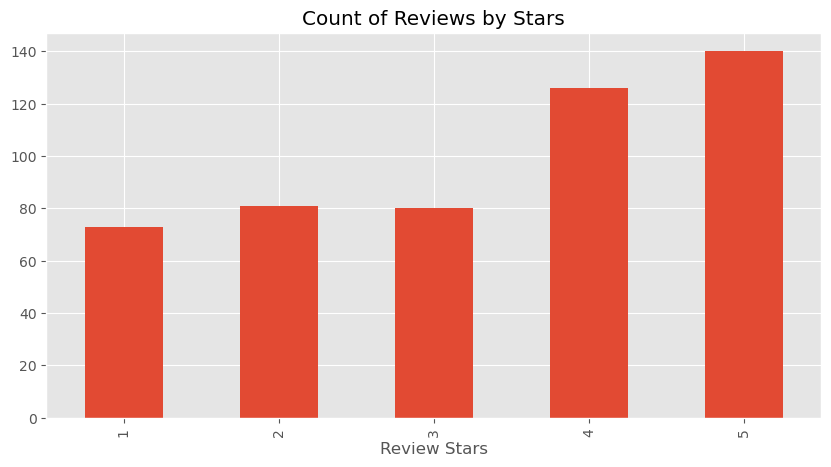

In [4]:
ax = df['rating'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

In [5]:
#Basic NLTL 
example = df['reviewText'] [50]
print (example)

I like dragons, and this was a free download, so I gave it a try. Aside from needing editing  to clear up the clunky storytelling, I found myself disappointed. The story starts slow, works up unevenly to a burst of action... only to end not with a conclusion, but with an out-of-the-blue jump into the premise of the Dragonseer Saga series. That was halfway through the download: the other half turned out to be a preview of the first full-length Dragoneers book. Even knowing that it was a prequel, even knowing that it was a novella, I'd hoped for a more complete, self-contained tale, not what amounted to an overlong Prologue. I didn't bother with the preview; if this novella is an accurate indicator of the author's style and sense of story, I already know the Dragonseer Saga won't be on my reading list anytime soon.


In [6]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\sulei\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [8]:
tokens = word_tokenize(example)
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('I', 'PRP'),
 ('like', 'VBP'),
 ('dragons', 'NNS'),
 (',', ','),
 ('and', 'CC'),
 ('this', 'DT'),
 ('was', 'VBD'),
 ('a', 'DT'),
 ('free', 'JJ'),
 ('download', 'NN')]

In [9]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  I/PRP
  like/VBP
  dragons/NNS
  ,/,
  and/CC
  this/DT
  was/VBD
  a/DT
  free/JJ
  download/NN
  ,/,
  so/IN
  I/PRP
  gave/VBD
  it/PRP
  a/DT
  try/NN
  ./.
  Aside/RB
  from/IN
  needing/VBG
  editing/VBG
  to/TO
  clear/VB
  up/RP
  the/DT
  clunky/NN
  storytelling/NN
  ,/,
  I/PRP
  found/VBD
  myself/PRP
  disappointed/JJ
  ./.
  The/DT
  story/NN
  starts/VBZ
  slow/JJ
  ,/,
  works/VBZ
  up/RP
  unevenly/RB
  to/TO
  a/DT
  burst/NN
  of/IN
  action/NN
  .../:
  only/RB
  to/TO
  end/VB
  not/RB
  with/IN
  a/DT
  conclusion/NN
  ,/,
  but/CC
  with/IN
  an/DT
  out-of-the-blue/JJ
  jump/NN
  into/IN
  the/DT
  premise/NN
  of/IN
  the/DT
  (ORGANIZATION Dragonseer/NNP Saga/NNP)
  series/NN
  ./.
  That/DT
  was/VBD
  halfway/RB
  through/IN
  the/DT
  download/NN
  :/:
  the/DT
  other/JJ
  half/NN
  turned/VBD
  out/RP
  to/TO
  be/VB
  a/DT
  preview/NN
  of/IN
  the/DT
  first/JJ
  full-length/JJ
  Dragoneers/NNS
  book/NN
  ./.
  Even/RB
  knowing/VBG
  that/IN
  i

In [10]:
#nltk.word_tokensize(example)

tokens = nltk.word_tokenize(example)
tokens[:10]

['I', 'like', 'dragons', ',', 'and', 'this', 'was', 'a', 'free', 'download']

In [11]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [12]:
sia.polarity_scores(' I am soo happy!')

{'neg': 0.0, 'neu': 0.334, 'pos': 0.666, 'compound': 0.6114}

In [13]:
sia.polarity_scores ('This is the worst thing ever')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [14]:
sia.polarity_scores(example)

{'neg': 0.015, 'neu': 0.903, 'pos': 0.083, 'compound': 0.8227}

In [15]:
df

,Id,Unnamed: 0,asin,helpful,rating,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0,11539,B0033UV8HI,"[8, 10]",3,"Jace Rankin may be short, but he's nothing to ...","09 2, 2010",A3HHXRELK8BHQG,Ridley,Entertaining But Average,1283385600
1,1,5957,B002HJV4DE,"[1, 1]",5,Great short read. I didn't want to put it dow...,"10 8, 2013",A2RGNZ0TRF578I,Holly Butler,Terrific menage scenes!,1381190400
2,2,9146,B002ZG96I4,"[0, 0]",3,I'll start by saying this is the first of four...,"04 11, 2014",A3S0H2HV6U1I7F,Merissa,Snapdragon Alley,1397174400
3,3,7038,B002QHWOEU,"[1, 3]",3,Aggie is Angela Lansbury who carries pocketboo...,"07 5, 2014",AC4OQW3GZ919J,Cleargrace,very light murder cozy,1404518400
4,4,1776,B001A06VJ8,"[0, 1]",4,I did not expect this type of book to be in li...,"12 31, 2012",A3C9V987IQHOQD,Rjostler,Book,1356912000
...,...,...,...,...,...,...,...,...,...,...,...
495,495,17432,B003L78146,"[0, 0]",2,The story is about a little duck who braves a ...,"03 31, 2014",A131K2AZ4LWFHW,Gramandtoddlers,Encourages dangerous situations,1396224000
496,496,41,B000FC1BN8,"[0, 0]",3,** Note: this story appears as a bonus in the ...,"05 14, 2012",A2OIGPPBTR65MR,para,"Enjoyable, if unremarkable, stormtrooper tale.",1336953600
497,497,17034,B003JH86TI,"[0, 3]",1,This is a list of regular boring travel tips t...,"11 11, 2011",A3A7FF87LEVCQ1,morehumanthanhuman,"Annoying, ummmmm, style",1320969600
498,498,1153,B0013N884S,"[0, 0]",2,These stories were just not on a par with the ...,"06 29, 2014",A29QE9ZPRUZCAI,S. J TURNER,NOT AS GOOD AS THE FIRST BOOK...,1404000000


In [16]:
#  To Run the polarity score on the entire dataset
res= {}
for i, row in  tqdm(df.iterrows(), total=len(df)):
    text = row['reviewText']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/500 [00:00<?, ?it/s]

In [17]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')

In [18]:
vaders.head()

,Id,neg,neu,pos,compound,Unnamed: 0,asin,helpful,rating,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0,0.129,0.708,0.163,0.9559,11539,B0033UV8HI,"[8, 10]",3,"Jace Rankin may be short, but he's nothing to ...","09 2, 2010",A3HHXRELK8BHQG,Ridley,Entertaining But Average,1283385600
1,1,0.044,0.673,0.283,0.9645,5957,B002HJV4DE,"[1, 1]",5,Great short read. I didn't want to put it dow...,"10 8, 2013",A2RGNZ0TRF578I,Holly Butler,Terrific menage scenes!,1381190400
2,2,0.000,0.862,0.138,0.8555,9146,B002ZG96I4,"[0, 0]",3,I'll start by saying this is the first of four...,"04 11, 2014",A3S0H2HV6U1I7F,Merissa,Snapdragon Alley,1397174400
3,3,0.078,0.851,0.070,-0.1280,7038,B002QHWOEU,"[1, 3]",3,Aggie is Angela Lansbury who carries pocketboo...,"07 5, 2014",AC4OQW3GZ919J,Cleargrace,very light murder cozy,1404518400
4,4,0.000,0.861,0.139,0.4404,1776,B001A06VJ8,"[0, 1]",4,I did not expect this type of book to be in li...,"12 31, 2012",A3C9V987IQHOQD,Rjostler,Book,1356912000


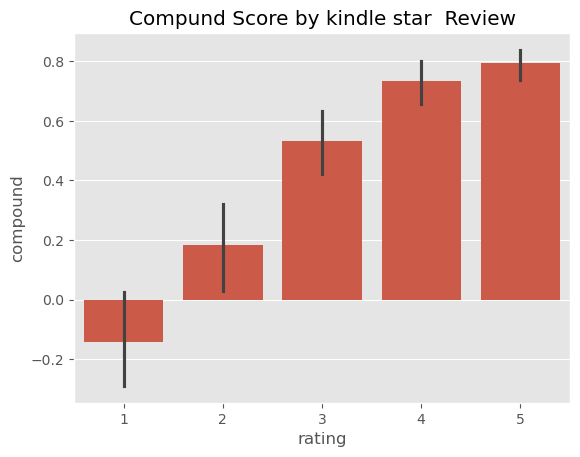

In [19]:
#plot the result
ax = sns.barplot(data=vaders, x='rating', y= 'compound')
ax.set_title ('Compund Score by kindle star  Review')
plt.show()

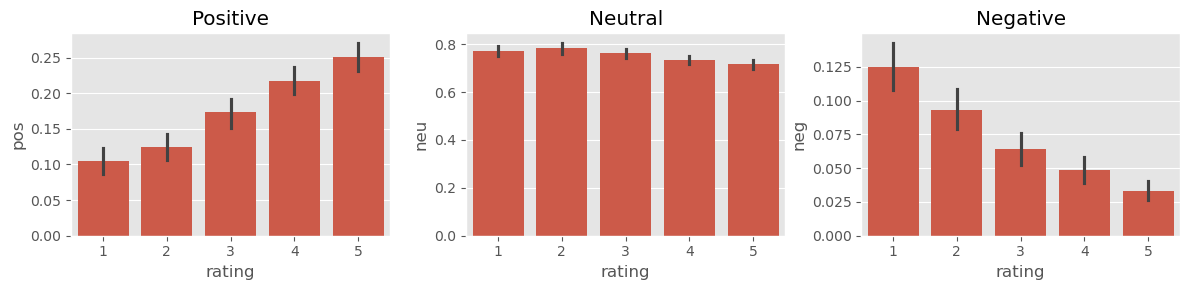

In [20]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='rating', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='rating', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='rating', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

In [21]:
%pip install transformers

In [23]:
%pip install transformers

#Roberta Pretrained model
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification


Note: you may need to restart the kernel to use updated packages.


None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [24]:
print(example)
sia.polarity_scores(example)

I like dragons, and this was a free download, so I gave it a try. Aside from needing editing  to clear up the clunky storytelling, I found myself disappointed. The story starts slow, works up unevenly to a burst of action... only to end not with a conclusion, but with an out-of-the-blue jump into the premise of the Dragonseer Saga series. That was halfway through the download: the other half turned out to be a preview of the first full-length Dragoneers book. Even knowing that it was a prequel, even knowing that it was a novella, I'd hoped for a more complete, self-contained tale, not what amounted to an overlong Prologue. I didn't bother with the preview; if this novella is an accurate indicator of the author's style and sense of story, I already know the Dragonseer Saga won't be on my reading list anytime soon.


{'neg': 0.015, 'neu': 0.903, 'pos': 0.083, 'compound': 0.8227}